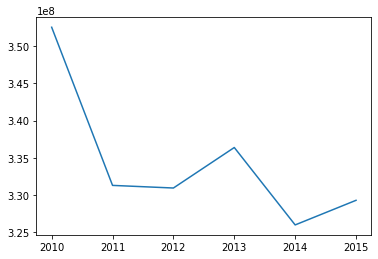

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl


df = pd.read_csv("AgroTempInsights.xls",delimiter=',',index_col=0)
# print(f'columns {df.columns}')

df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

# print(f'columns {df.columns}')
# pl.plot(df.filter(items=['district']))

df_crop_sum = df.filter(items=['state','district','crop','year','area']).groupby(['state','crop','year']).sum()

df_annual_sum = df.filter(items=['year','area']).groupby('year').sum()

ann_sum_plt=pl.plot(df_annual_sum)


In [3]:
df.columns

Index(['state', 'district', 'crop', 'year', 'season', 'area', 'production',
       'yield', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec', 'annual', 'jan-feb', 'mar-may', 'jun-sep',
       'oct-dec', 'avg temp in °c', 'dew point in °c', 'gust wind in kmh',
       'max temperature in °c', 'min temperature in °c', 'precipitation in mm',
       'sea level pressure in mb', 'wind in kmh'],
      dtype='object')

<AxesSubplot:xlabel='year'>

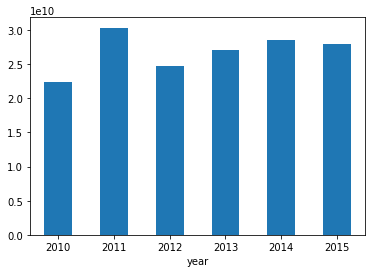

In [4]:
df_crop = df.filter(items=['year','production','yield']).groupby('year').sum()


# pl.bar(df_crop.filter(items=['year','area']),height=)

df_crop['production'].plot.bar()

df_crop['yield'].plot.line()

# pl.plot(df_crop['production'])


<AxesSubplot:xlabel='year,season'>

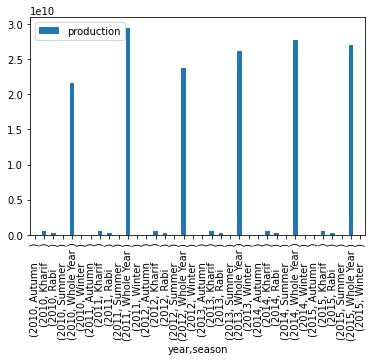

In [5]:
df_season = df.filter(items=['year','season','production']).groupby(['year','season']).sum()

df_season.plot.bar()

<AxesSubplot:xlabel='year'>

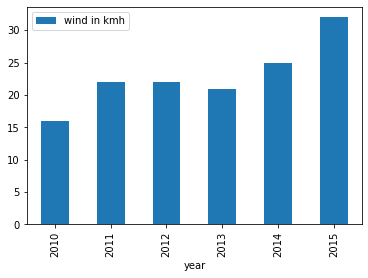

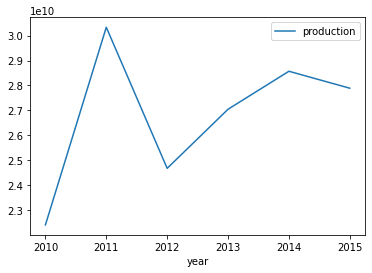

In [6]:
df.filter(items=['year','wind in kmh']).groupby('year').mean().plot.bar()
df.filter(items=['year','production']).groupby('year').sum().plot.line()
# df_wind

<AxesSubplot:xlabel='year'>

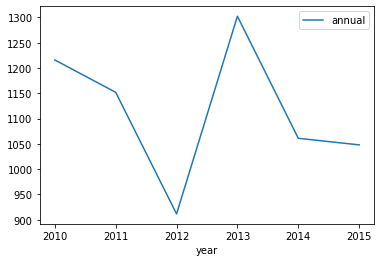

In [7]:
df.filter(items=['year','annual']).groupby('year').mean().plot.line()

<AxesSubplot:xlabel='year'>

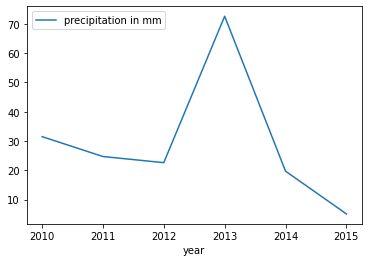

In [8]:
df.filter(items=['year','precipitation in mm']).groupby('year').mean().plot.line()

In [9]:
df_crop = df.filter(items=['year','state','production'])
df_crop['state']=df_crop['state'].apply(lambda x: x.strip())

df_crop = df_crop.groupby(['year','state']).sum().unstack()
df_crop['production'].fillna(0,inplace=True)
df_crop = df_crop['production']

df_crop.columns


Index(['Andaman and Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Odisha', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'],
      dtype='object', name='state')

In [10]:
agro_ecological_zones = {
    'Rajasthan': 'Arid Ecosystem',
    'Andhra Pradesh': 'Semi-Arid Ecosystem',
    'Karnataka': 'Semi-Arid Ecosystem',
    'Maharashtra': 'Semi-Arid Ecosystem',
    'Telangana': 'Semi-Arid Ecosystem',
    'Bihar': 'Sub-Humid Ecosystem',
    'Jharkhand': 'Sub-Humid Ecosystem',
    'Odisha': 'Sub-Humid Ecosystem',
    'Uttar Pradesh': 'Sub-Humid Ecosystem',
    'Assam': 'Humid Ecosystem',
    'West Bengal': 'Humid Ecosystem',
    'Tamil Nadu': 'Coastal Ecosystem',
    'Kerala': 'Coastal Ecosystem',
    'Goa': 'Coastal Ecosystem',
    'Himachal Pradesh': 'Hill and Mountain Ecosystem',
    'Jammu and Kashmir': 'Hill and Mountain Ecosystem',
    'Uttarakhand': 'Hill and Mountain Ecosystem',
    'Andaman and Nicobar Island': 'Union Territory (Diverse Ecosystems)'
}

In [11]:
df_crop = df.filter(items=['year','state','production'])
df_crop['state']=df_crop['state'].apply(lambda x: x.strip())

df_crop['region'] = df_crop['state'].map(agro_ecological_zones)

df_crop = df_crop.groupby(['year','region']).sum().unstack()
# df_crop = df_crop.groupby(['year','region']).sum('production').mean('precipitation in mm')
df_crop['production'].fillna(0,inplace=True)
# df_crop
df_crop = df_crop['production']



In [12]:
df_yield = df.filter(items=['year','state','yield'])
df_yield['state']=df_yield['state'].apply(lambda x: x.strip())

df_yield['region'] = df_yield['state'].map(agro_ecological_zones)

df_yield = df_yield.groupby(['year','region']).sum().unstack()
df_yield['yield'].fillna(0,inplace=True)
df_yield = df_yield['yield']
df_yield

region,Arid Ecosystem,Coastal Ecosystem,Hill and Mountain Ecosystem,Humid Ecosystem,Semi-Arid Ecosystem,Sub-Humid Ecosystem,Union Territory (Diverse Ecosystems)
year,,,,,,,
2010,6506.10,96313.56,1986.12,421452.83,1308878.68,25431.83,11639.79
2011,6773.56,517130.03,2146.03,425171.24,1389288.71,30259.61,14785.32
2012,6954.60,98995.22,2245.75,399896.22,1308704.40,34009.09,16105.25
2013,6926.50,412775.12,1681.77,406395.64,1146499.76,33743.95,15897.01
2014,6401.92,448623.22,2075.49,428576.42,1237084.78,32811.26,16312.53
2015,7595.96,482921.82,2164.50,453565.97,1092488.04,31972.11,16936.78


,crop,season
0,Arecanut,Rabi
1,Arecanut,Rabi
2,Arecanut,Rabi
3,Arhar/Tur,Rabi
4,Arhar/Tur,Rabi
...,...,...
148161,Wheat,Rabi
148162,Wheat,Rabi
148163,Wheat,Rabi
148164,Wheat,Rabi


In [13]:
df_climate = df.filter(items=['year','avg temp in °c', 'dew point in °c', 'gust wind in kmh',
       'max temperature in °c', 'min temperature in °c', 'precipitation in mm',
       'sea level pressure in mb', 'wind in kmh']).groupby('year').mean()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df_crop)
df_crop = pd.DataFrame(normalized_data, columns=df_crop.columns,index=df_crop.index)
df_crop


region,Arid Ecosystem,Coastal Ecosystem,Hill and Mountain Ecosystem,Humid Ecosystem,Semi-Arid Ecosystem,Sub-Humid Ecosystem,Union Territory (Diverse Ecosystems)
year,,,,,,,
2010,1.000000,0.000000,0.854178,0.460626,0.580231,0.000000,0.000000
2011,0.769594,1.000000,0.939640,1.000000,0.928299,0.346133,0.273132
2012,0.337029,0.147863,1.000000,0.000000,1.000000,0.970641,0.822359
2013,0.584709,0.895564,0.000000,0.321299,0.000000,1.000000,0.929110
2014,0.220719,0.944377,0.217356,0.323007,0.429841,0.772229,0.950825
2015,0.000000,0.972087,0.725785,0.619210,0.114654,0.823986,1.000000


In [15]:
normalized_data = scaler.fit_transform(df_yield)
df_yield = pd.DataFrame(normalized_data, columns=df_yield.columns,index=df_yield.index)

df_yield


region,Arid Ecosystem,Coastal Ecosystem,Hill and Mountain Ecosystem,Humid Ecosystem,Semi-Arid Ecosystem,Sub-Humid Ecosystem,Union Territory (Diverse Ecosystems)
year,,,,,,,
2010,0.087250,0.000000,0.539647,0.401653,0.729077,0.000000,0.000000
2011,0.311246,1.000000,0.823185,0.470936,1.000000,0.562858,0.593833
2012,0.462866,0.006373,1.000000,0.000000,0.728490,1.000000,0.843018
2013,0.439332,0.752018,0.000000,0.121100,0.181980,0.969088,0.803706
2014,0.000000,0.837205,0.698110,0.534383,0.487185,0.860348,0.882150
2015,1.000000,0.918710,0.855935,1.000000,0.000000,0.762514,1.000000


In [16]:
normalized_data = scaler.fit_transform(df_climate)
df_climate = pd.DataFrame(normalized_data, columns=df_climate.columns,index=df_climate.index)

df_climate

,avg temp in °c,dew point in °c,gust wind in kmh,max temperature in °c,min temperature in °c,precipitation in mm,sea level pressure in mb,wind in kmh
year,,,,,,,,
2010,0.0,1.0,0.000000,0.0,0.0,0.391111,0.391111,0.0000
2011,0.6,1.0,0.285714,0.6,0.5,0.290370,0.290370,0.3750
2012,0.6,0.5,0.428571,0.4,0.5,0.259259,0.259259,0.3750
2013,0.0,0.5,0.500000,0.0,0.0,1.000000,1.000000,0.3125
2014,1.0,0.5,0.500000,1.0,1.0,0.216296,0.216296,0.5625
2015,0.8,0.0,1.000000,0.6,0.5,0.000000,0.000000,1.0000


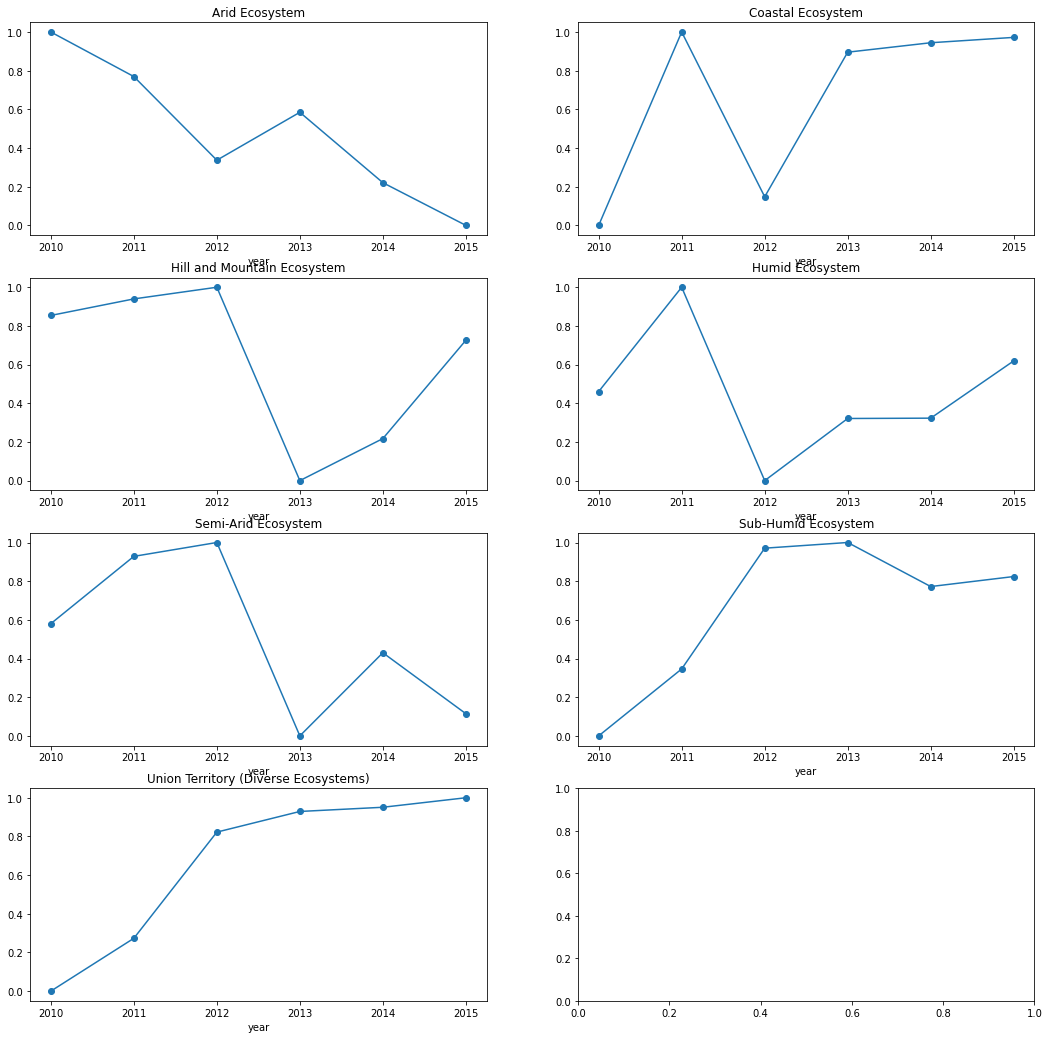

In [17]:
fig, axes = pl.subplots(4,2,figsize=(18, 18))

axes = axes.flatten()

for i, col in enumerate(df_crop.columns):
    df_crop[col].plot(ax=axes[i], title=col, marker='o', linestyle='-')

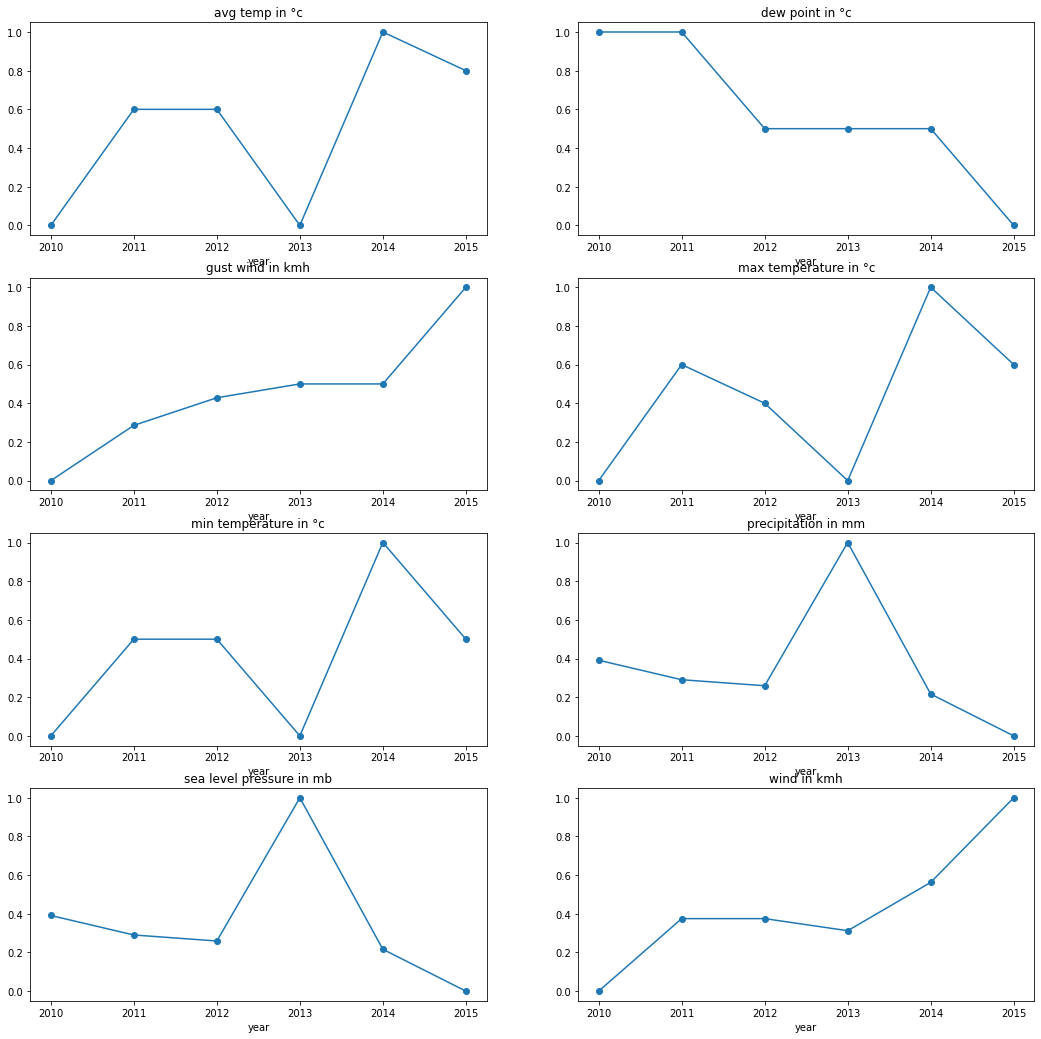

In [18]:
fig, axes = pl.subplots(4,2,figsize=(18, 18))

axes = axes.flatten()

for i, col in enumerate(df_climate.columns):
    df_climate[col].plot(ax=axes[i], title=col, marker='o', linestyle='-')

<AxesSubplot:title={'center':'precipitation in mm'}, xlabel='year'>

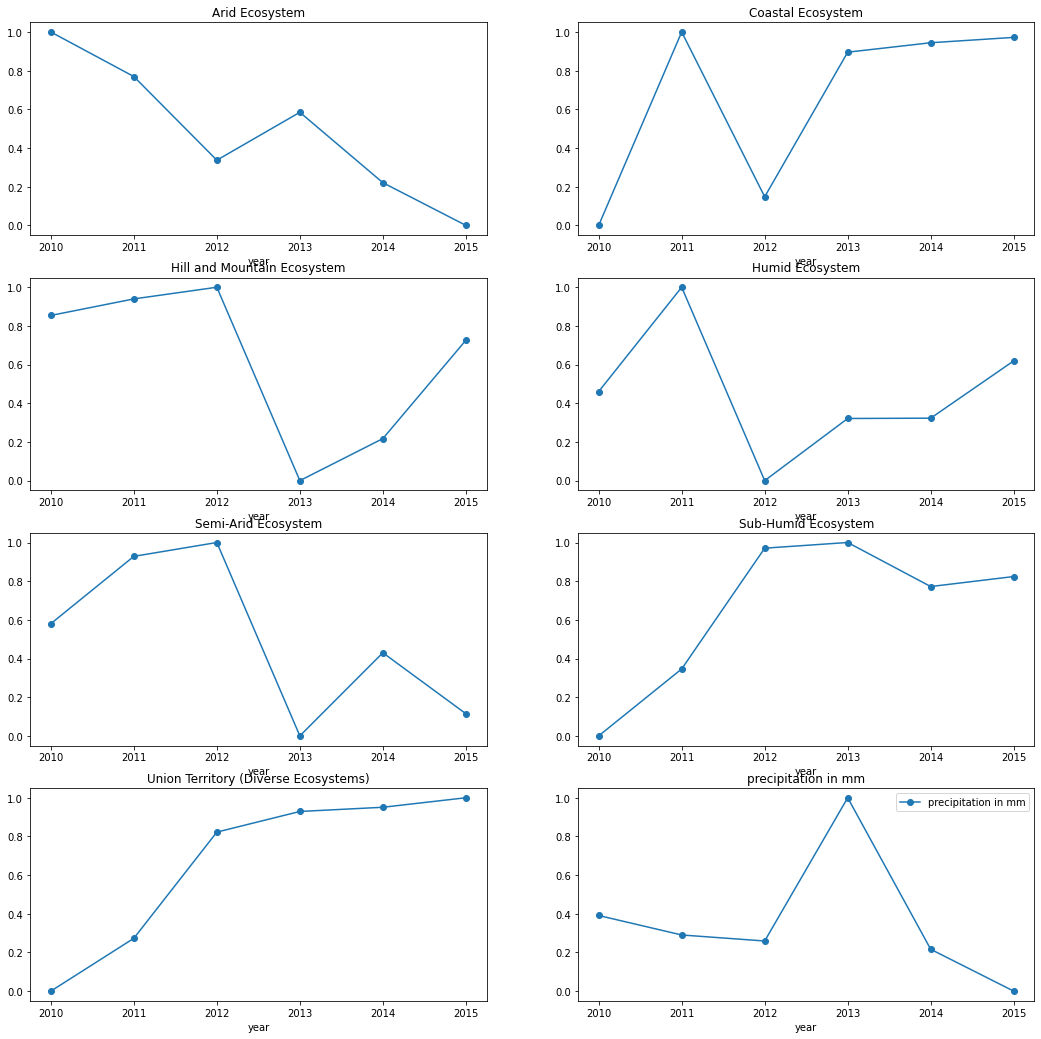

In [19]:

# pl.plot(df_crop.index.values, df_crop['Arid Ecosystem'],marker='o')
# pl.plot(df_climate.index.values,df_climate['avg temp in °c'],marker='o')
# df_crop.filter(items=['year','Arid Ecosystem']).plot.line()
# df_climate.filter(items=['year','avg temp in °c']).plot.line()
fig, axes = pl.subplots(4,2,figsize=(18, 18))

axes = axes.flatten()

for i, col in enumerate(df_crop.columns):
    df_crop[col].plot(ax=axes[i], title=col, marker='o', linestyle='-')
# df_climate.filter(items=['year','avg temp in °c']).plot(ax=axes[7], title=col, marker='o', linestyle='-')
df_climate.filter(items=['year','precipitation in mm']).groupby('year').mean().plot(ax=axes[7], title='precipitation in mm', marker='o', linestyle='-')

Text(0.5, 0.98, 'Arid Ecosystem Against all climate')

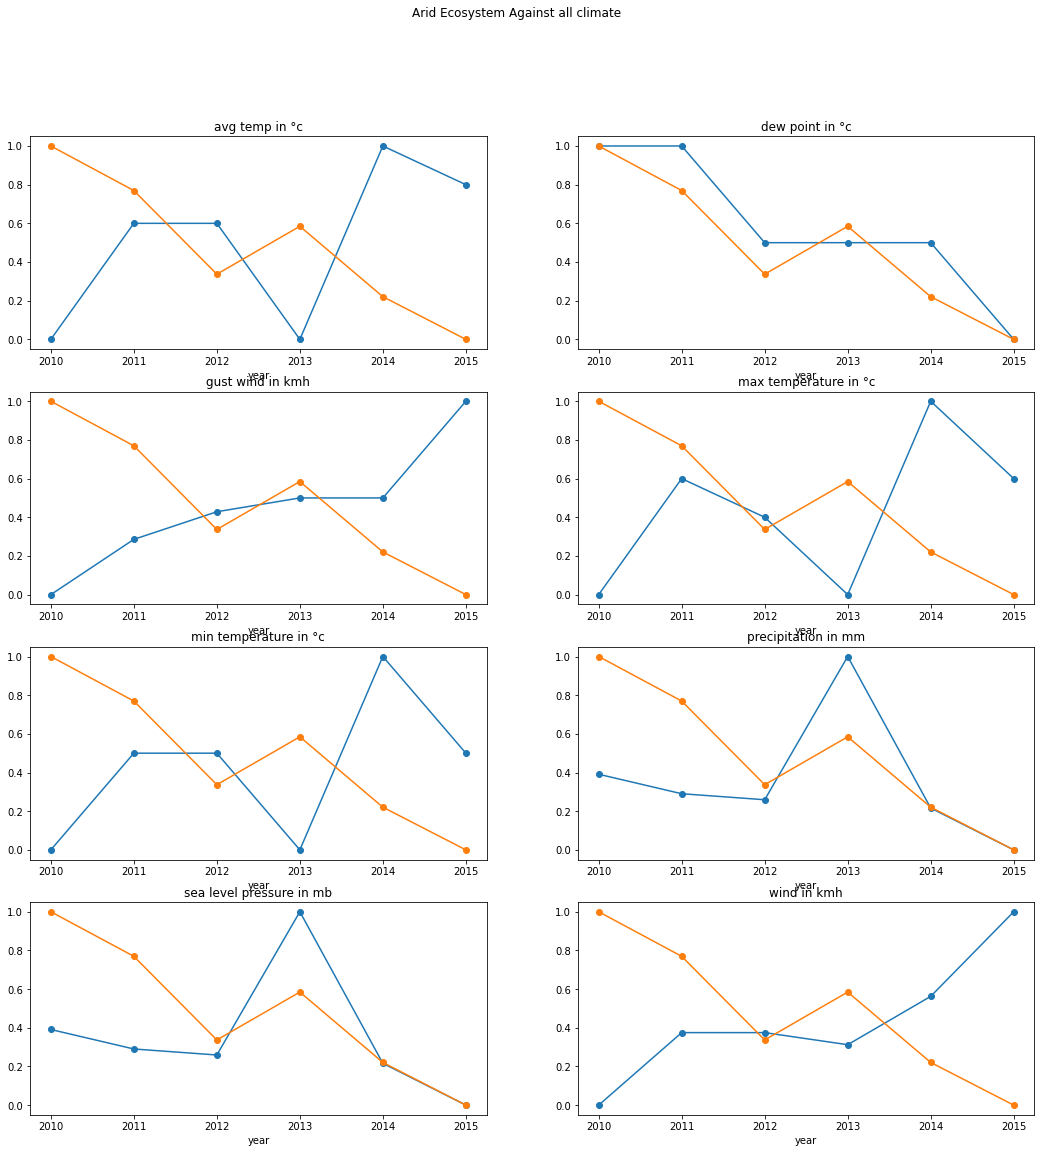

In [20]:
fig, axes = pl.subplots(4,2,figsize=(18, 18))

axes = axes.flatten()

for i, col in enumerate(df_climate.columns):
    df_climate[col].plot(ax=axes[i], title=col, marker='o', linestyle='-')
    df_crop['Arid Ecosystem'].plot(ax=axes[i], title=col, marker='o', linestyle='-',legend=)

fig.suptitle('Arid Ecosystem Against all climate')
    


Text(0.5, 0.98, 'Arid Ecosystem Against all climate')

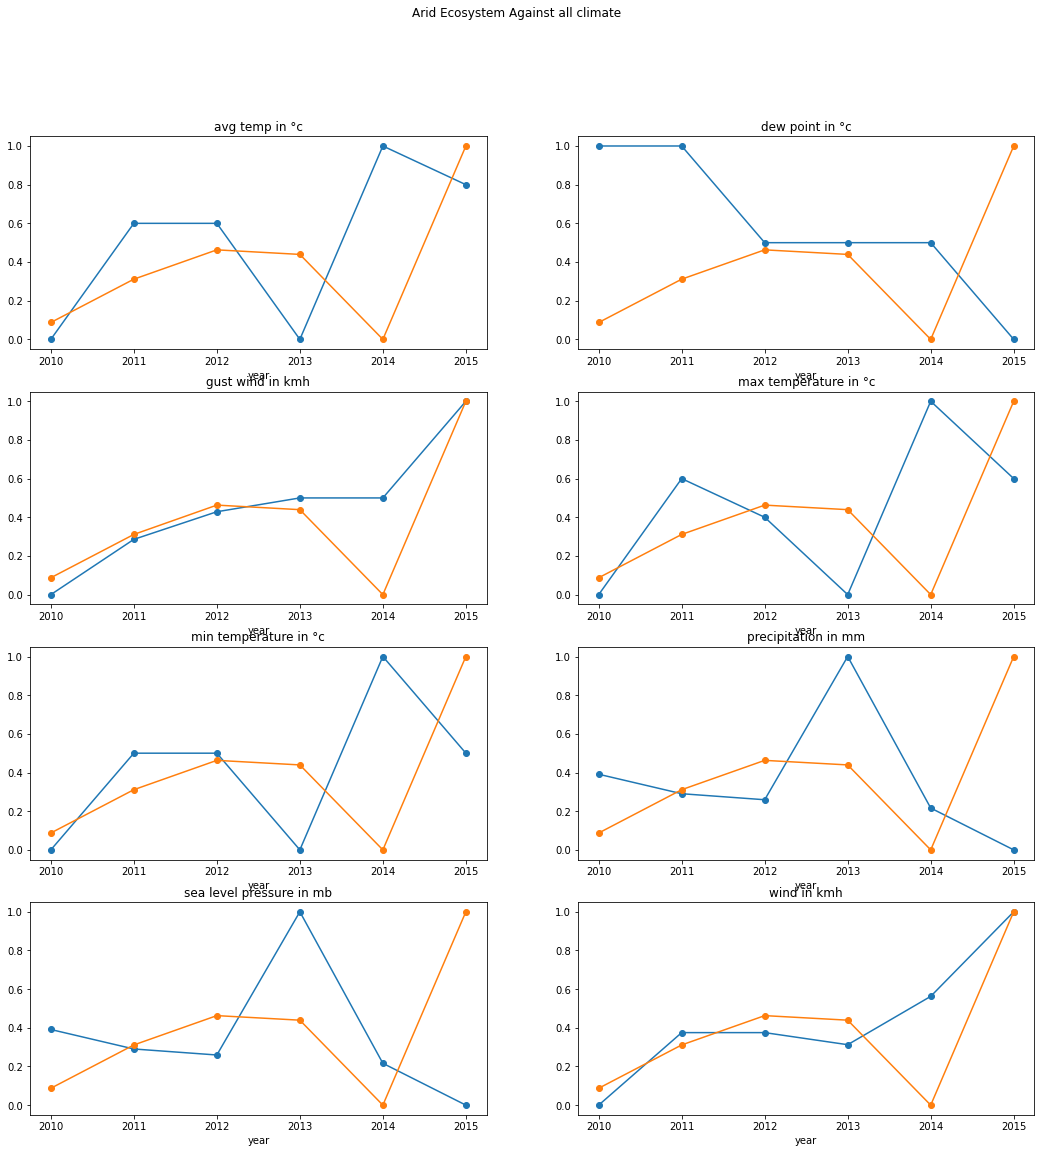

In [21]:
fig, axes = pl.subplots(4,2,figsize=(18, 18))

axes = axes.flatten()

for i, col in enumerate(df_climate.columns):
    df_climate[col].plot(ax=axes[i], title=col, marker='o', linestyle='-')
    df_yield['Arid Ecosystem'].plot(ax=axes[i], title=col, marker='o', linestyle='-')

fig.suptitle('Arid Ecosystem Against all climate')

In [23]:
df['crop'].unique()

array(['Arecanut', 'Arhar/Tur', 'Banana', 'Black pepper', 'Cashewnut',
       'Coconut ', 'Dry chillies', 'Ginger', 'Groundnut', 'Maize',
       'Moong(Green Gram)', 'Rice', 'Sugarcane', 'Sunflower',
       'Sweet potato', 'Tapioca', 'Turmeric', 'Urad', 'Bajra',
       'Castor seed', 'Coriander', 'Cotton(lint)', 'Garlic', 'Gram',
       'Horse-gram', 'Jowar', 'Linseed', 'Mesta', 'Niger seed', 'Onion',
       'Other  Rabi pulses', 'Other Kharif pulses', 'Potato', 'Ragi',
       'Rapeseed &Mustard', 'Safflower', 'Sesamum', 'Small millets',
       'Soyabean', 'Tobacco', 'Wheat', 'Oilseeds total', 'Jute', 'Masoor',
       'Peas & beans (Pulses)', 'Barley', 'Khesari', 'Sannhamp',
       'Guar seed', 'Moth', 'Other Cereals', 'other oilseeds',
       'Cowpea(Lobia)', 'Cardamom'], dtype=object)

In [24]:
df['season'].unique()

array(['Rabi       ', 'Whole Year ', 'Autumn     ', 'Kharif     ',
       'Summer     ', 'Winter     '], dtype=object)

In [44]:
sr=df.filter(items=['crop','season']).groupby('season').agg({
    'crop': lambda x: ', '.join(sorted(set(x)))})['crop']
dict = {key: value.split(', ') for key, value in sr.items()}
dict

{'Autumn     ': ['Groundnut',
  'Jowar',
  'Jute',
  'Maize',
  'Moong(Green Gram)',
  'Ragi',
  'Rice',
  'Sesamum',
  'Small millets',
  'Sugarcane',
  'Urad'],
 'Kharif     ': ['Arecanut',
  'Arhar/Tur',
  'Bajra',
  'Banana',
  'Barley',
  'Black pepper',
  'Cashewnut',
  'Castor seed',
  'Coriander',
  'Cotton(lint)',
  'Cowpea(Lobia)',
  'Dry chillies',
  'Garlic',
  'Ginger',
  'Gram',
  'Groundnut',
  'Guar seed',
  'Horse-gram',
  'Jowar',
  'Jute',
  'Linseed',
  'Maize',
  'Masoor',
  'Mesta',
  'Moong(Green Gram)',
  'Moth',
  'Niger seed',
  'Oilseeds total',
  'Onion',
  'Other Cereals',
  'Other Kharif pulses',
  'Peas & beans (Pulses)',
  'Potato',
  'Ragi',
  'Rapeseed &Mustard',
  'Rice',
  'Safflower',
  'Sannhamp',
  'Sesamum',
  'Small millets',
  'Soyabean',
  'Sugarcane',
  'Sunflower',
  'Sweet potato',
  'Tapioca',
  'Tobacco',
  'Turmeric',
  'Urad',
  'other oilseeds'],
 'Rabi       ': ['Arecanut',
  'Arhar/Tur',
  'Bajra',
  'Barley',
  'Black pepper',
  'Ca

In [39]:
df.query('crop == "Arecanut"')['season'].unique()

array(['Rabi       ', 'Whole Year ', 'Kharif     '], dtype=object)

In [54]:
df_y = df.filter(items=['year','yield']).groupby('year').sum()
normalized_data = scaler.fit_transform(df_y)
df_y = pd.DataFrame(normalized_data, columns=df_y.columns,index=df_y.index)
df_y

,yield
year,
2010,0.002456
2011,1.000000
2012,0.000000
2013,0.311437
2014,0.584950
2015,0.442967


Text(0.5, 0.98, 'Arid Ecosystem Against all climate')

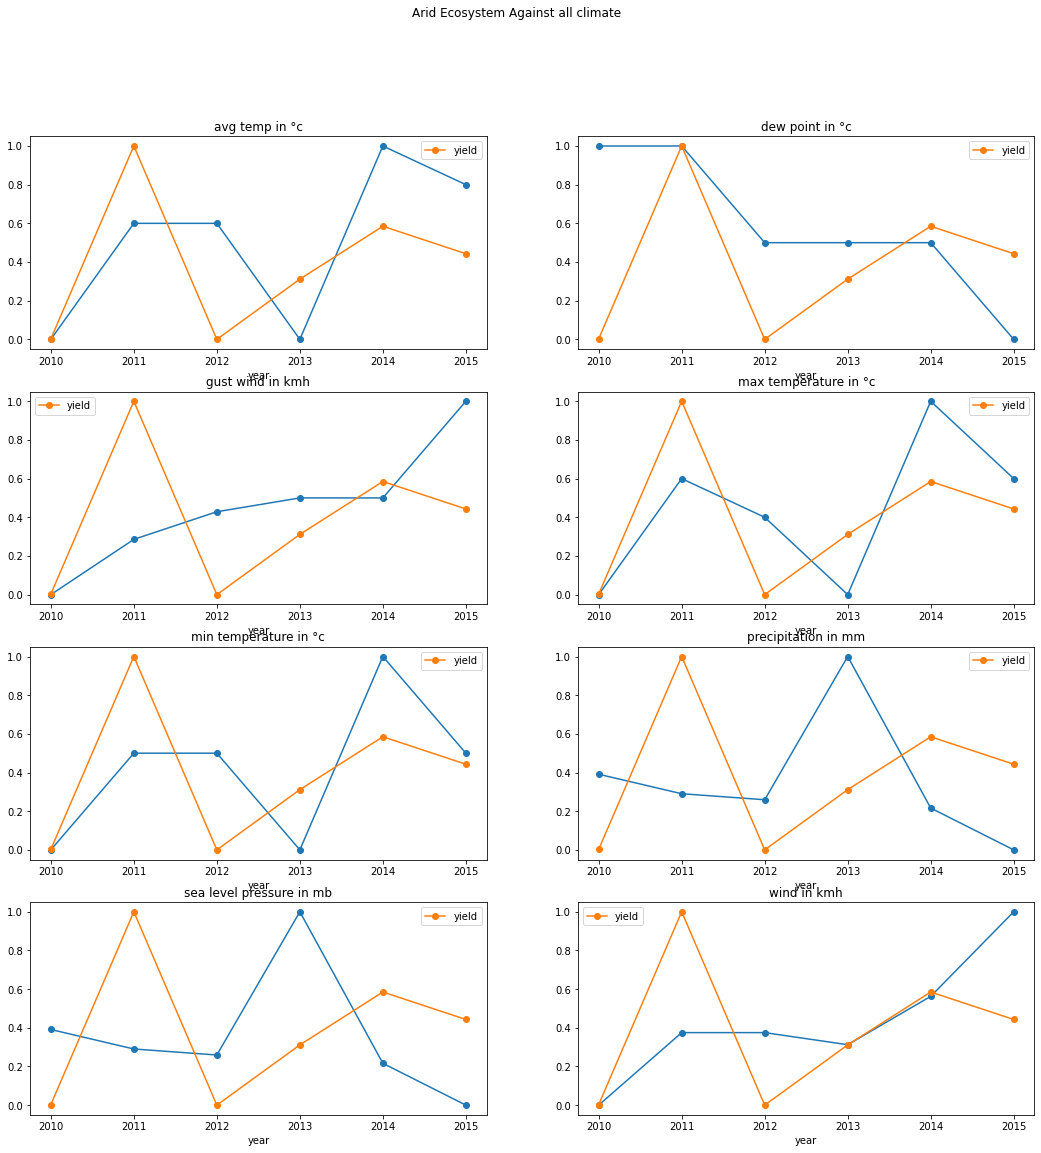

In [55]:
fig, axes = pl.subplots(4,2,figsize=(18, 18))

axes = axes.flatten()

for i, col in enumerate(df_climate.columns):
    df_climate[col].plot(ax=axes[i], title=col, marker='o', linestyle='-')
    df_y.plot(ax=axes[i], title=col, marker='o', linestyle='-')

fig.suptitle('Arid Ecosystem Against all climate')